In [1]:
import pycaret
from pycaret.classification import *
import pandas as pd

In [2]:
raw_data_path = "data/raw_data/phase-1/prob-1/raw_train.parquet"
raw_data = pd.read_parquet(raw_data_path)

In [55]:
raw_data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,label,feature14,feature15,feature16
0,Site engineer,grocery_pos,8.60,48230,40.213439,-85.203756,47583,42.508293,-83.168004,65.596062,3,5,1,1,8.017865,1.028822,58.911132
1,Site engineer,gas_transport,316.84,48230,44.379391,-82.859721,47583,42.661838,-81.966510,64.728795,6,5,1,1,11.768568,1.106217,64.431017
2,Site engineer,grocery_pos,294.89,48230,42.950657,-84.935542,47583,42.580470,-82.408529,65.434606,3,5,1,1,7.996359,0.899881,57.545348
3,Site engineer,shopping_net,831.08,48230,39.372111,-84.893973,47583,41.948688,-83.919881,64.990422,23,6,1,1,8.767720,1.062966,62.681169
4,Site engineer,health_fitness,1063.84,48230,41.227499,-83.228392,47583,41.544743,-82.123365,65.316083,23,6,1,1,8.816222,0.722446,63.084486


In [56]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134201 entries, 0 to 134200
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   feature1   134201 non-null  object 
 1   feature2   134201 non-null  object 
 2   feature3   134201 non-null  float64
 3   feature4   134201 non-null  int64  
 4   feature5   134201 non-null  float64
 5   feature6   134201 non-null  float64
 6   feature7   134201 non-null  int64  
 7   feature8   134201 non-null  float64
 8   feature9   134201 non-null  float64
 9   feature10  134201 non-null  float64
 10  feature11  134201 non-null  int64  
 11  feature12  134201 non-null  int64  
 12  feature13  134201 non-null  int64  
 13  label      134201 non-null  int64  
 14  feature14  134201 non-null  float64
 15  feature15  134201 non-null  float64
 16  feature16  134201 non-null  float64
dtypes: float64(9), int64(6), object(2)
memory usage: 17.4+ MB


In [6]:
raw_data["label"].value_counts()

0    125704
1      8497
Name: label, dtype: int64

In [57]:
blacklist_models = ['rf', 'et', 'ada', 'gbr']

In [3]:
s = setup(raw_data, target="label", session_id=123)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(134201, 17)"
4,Transformed data shape,"(134201, 30)"
5,Transformed train set shape,"(93940, 30)"
6,Transformed test set shape,"(40261, 30)"
7,Numeric features,14
8,Categorical features,2
9,Preprocess,True


In [63]:
best = compare_models(exclude=blacklist_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9942,0.9988,0.9401,0.9669,0.9533,0.9501,0.9503,0.2570
gbc,Gradient Boosting Classifier,0.9915,0.9975,0.9094,0.9536,0.9309,0.9263,0.9267,0.2880
dt,Decision Tree Classifier,0.9851,0.9394,0.8870,0.8786,0.8827,0.8747,0.8748,0.2260
lda,Linear Discriminant Analysis,0.9800,0.9776,0.7513,0.9177,0.8261,0.8156,0.8203,0.1890
ridge,Ridge Classifier,0.9706,0.0000,0.5627,0.9552,0.7082,0.6938,0.7209,0.4100
knn,K Neighbors Classifier,0.9610,0.8930,0.5267,0.7873,0.6308,0.6111,0.6251,5.7130
lr,Logistic Regression,0.9608,0.8642,0.4713,0.8402,0.6036,0.5847,0.6120,0.7280
nb,Naive Bayes,0.9588,0.8927,0.4928,0.7753,0.6024,0.5818,0.5986,0.2560
svm,SVM - Linear Kernel,0.9408,0.0000,0.3262,0.5877,0.4009,0.3736,0.3998,0.1880
dummy,Dummy Classifier,0.9367,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1850


In [64]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [4]:
best_1 = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9951,0.9992,0.9478,0.9740,0.9608,0.9581,0.9582
1,0.9943,0.9989,0.9360,0.9720,0.9537,0.9506,0.9508
2,0.9957,0.9994,0.9647,0.9680,0.9663,0.9641,0.9641
3,0.9937,0.9991,0.9412,0.9589,0.9500,0.9466,0.9467
4,0.9931,0.9982,0.9311,0.9585,0.9446,0.9409,0.9410
5,0.9947,0.9988,0.9546,0.9611,0.9578,0.9550,0.9550
6,0.9931,0.9980,0.9160,0.9732,0.9437,0.9400,0.9405
7,0.9940,0.9992,0.9378,0.9671,0.9522,0.9490,0.9492
8,0.9939,0.9992,0.9395,0.9638,0.9515,0.9483,0.9483


In [5]:
best_1 = finalize_model(best_1)

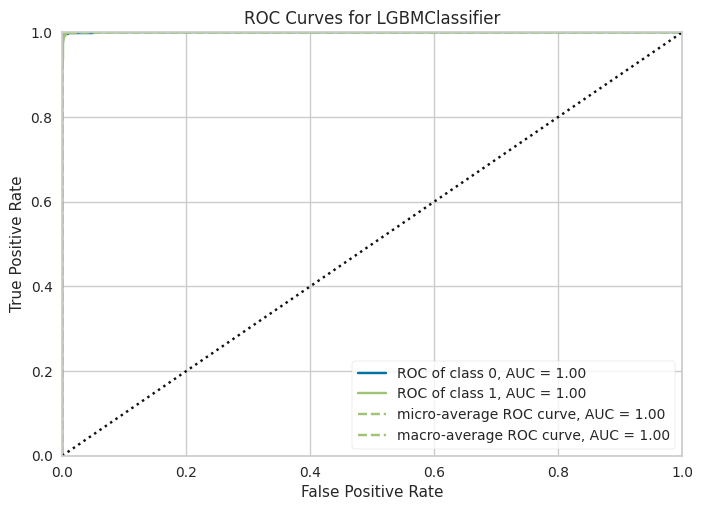

In [6]:
plot_model(best_1, plot = 'auc')

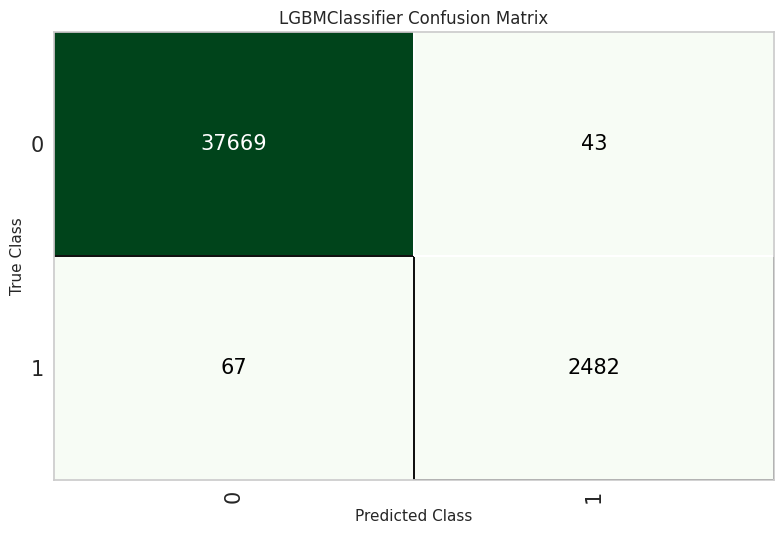

In [8]:
plot_model(best_1, plot = 'confusion_matrix')

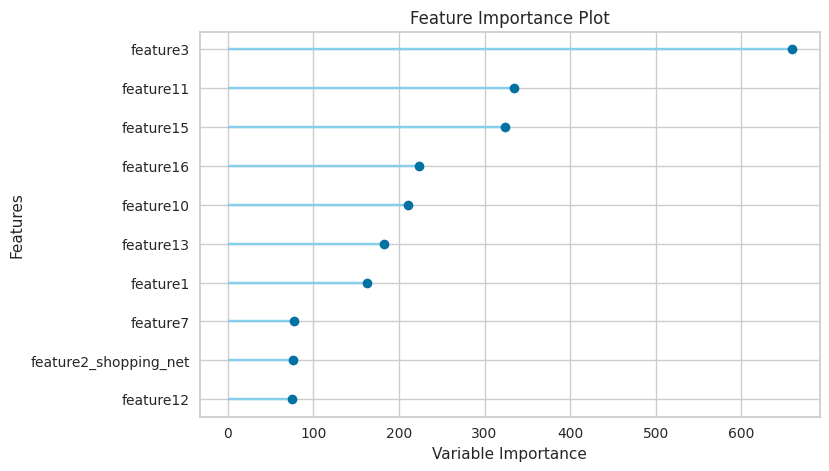

In [10]:
plot_model(best_1, plot = 'feature')

In [67]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9925,0.9977,0.9451,0.9374,0.9412,0.9372,0.9372


In [23]:
holdout_pred.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,label,prediction_label,prediction_score
12693,Medical technical officer,home,67.080002,19473,41.020706,-76.317970,15726,39.976948,-74.691772,61.577709,20,6,2,10.084238,0.613705,68.256042,0,0,0.9999
4863,Jewellery designer,home,22.680000,10512,44.031914,-73.637215,25590,41.563934,-72.941925,61.277744,19,5,2,7.696316,0.748383,54.643597,0,0,0.9513
85910,"Horticulturist, amenity",health_fitness,9.760000,46237,35.367950,-83.617172,910148,39.464996,-86.127159,47.608295,19,6,2,4.364408,0.729764,62.398579,0,0,0.9939
13832,"Editor, commissioning",travel,70.870003,91354,34.391659,-119.765282,61327,35.426243,-117.795738,77.921242,12,0,2,8.669675,0.254761,69.314430,0,0,1.0000
95714,Geophysicist/field seismologist,misc_pos,72.290001,78405,26.676815,-95.067909,306433,28.256826,-97.916481,34.214241,0,2,1,7.539035,0.982364,69.730835,0,0,0.9981


In [11]:
save_model(best_1, 'phase1-prob1-model1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['feature3', 'feature4', 'feature5',
                                              'feature6', 'feature7', 'feature8',
                                              'feature9', 'feature10',
                                              'feature11', 'feature12',
                                              'feature13', 'feature14',
                                              'feature15', 'feature16'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=Non...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
              

In [12]:
raw_data_path_2 = "data/raw_data/phase-1/prob-2/raw_train.parquet"
raw_data_2 = pd.read_parquet(raw_data_path_2)

In [13]:
raw_data_2.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,label
0,V1,4.781942,V2,V8,1337.025331,V4,V4,2.0,V2,V0,...,V2,35.689494,none,V1,1.0,V2,1.0,none,yes,0
1,V3,22.764682,V4,V2,1664.415301,V0,V4,4.0,V1,V0,...,V0,23.265980,none,V1,2.0,V2,1.0,none,yes,0
2,V3,7.462099,V2,V3,750.653224,V3,V2,4.0,V2,V0,...,V2,34.060872,stores,V0,1.0,V2,1.0,yes,yes,0
3,V3,23.718364,V4,V7,4829.002078,V4,V2,4.0,V1,V0,...,V3,62.477448,none,V1,2.0,V1,1.0,none,yes,0
4,V3,13.768903,V3,V3,3559.956292,V3,V4,1.0,V1,V0,...,V2,41.999120,bank,V1,1.0,V2,1.0,yes,yes,0


In [16]:
numeric_columns = [
        "feature2",
        "feature5",
        "feature13",
        "feature18"
    ]
category_columns = [
    "feature1",
    "feature3",
    "feature4",
    "feature6",
    "feature7",
    "feature8",
    "feature9",
    "feature10",
    "feature11",
    "feature12",
    "feature14",
    "feature15",
    "feature16",
    "feature17",
    "feature19",
    "feature20"
]

In [20]:
s = setup(raw_data_2, target="label", session_id=123, numeric_features=numeric_columns, categorical_features=category_columns)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(60000, 21)"
4,Transformed data shape,"(60000, 71)"
5,Transformed train set shape,"(42000, 71)"
6,Transformed test set shape,"(18000, 71)"
7,Ordinal features,2
8,Numeric features,4
9,Categorical features,16


In [21]:
best_2 = compare_models(exclude=['et', 'ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8139,0.8686,0.5984,0.7388,0.6612,0.5348,0.5405,2.1600
gbc,Gradient Boosting Classifier,0.8011,0.8514,0.5398,0.7349,0.6223,0.4917,0.5025,17.6490
rf,Random Forest Classifier,0.7895,0.8358,0.5182,0.7101,0.5991,0.4610,0.4716,12.4260
lda,Linear Discriminant Analysis,0.7830,0.8258,0.5316,0.6833,0.5979,0.4524,0.4592,1.7890
ridge,Ridge Classifier,0.7826,0.0000,0.5022,0.6973,0.5839,0.4420,0.4529,0.6500
lr,Logistic Regression,0.7816,0.8227,0.5287,0.6806,0.5951,0.4487,0.4555,3.2370
nb,Naive Bayes,0.7405,0.7853,0.6298,0.5653,0.5958,0.4056,0.4069,0.6400
dt,Decision Tree Classifier,0.6995,0.6476,0.5153,0.5051,0.5101,0.2935,0.2935,1.1750
dummy,Dummy Classifier,0.6964,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.9360
knn,K Neighbors Classifier,0.6607,0.5894,0.2510,0.4050,0.3098,0.1012,0.1062,2.6340


In [22]:
best_2 = finalize_model(best_2)

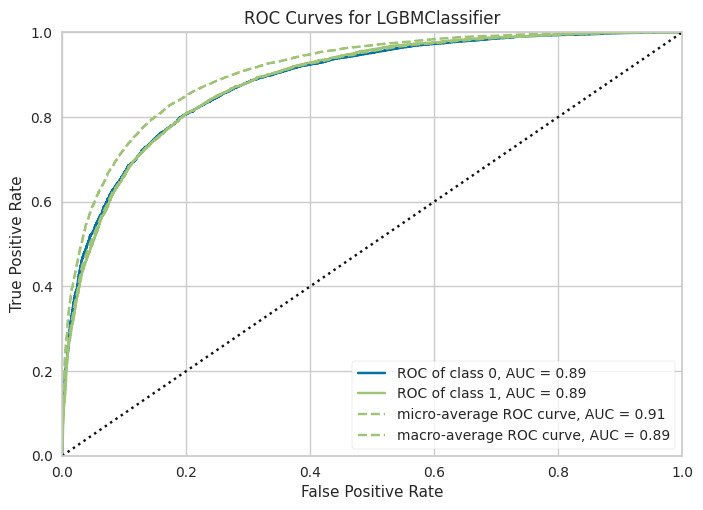

In [23]:
plot_model(best_2, plot = 'auc')

In [24]:
save_model(best_2, 'phase1-prob2-model1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['feature2', 'feature5',
                                              'feature13', 'feature18'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Trans...
                  LGBMClassifier(boosting_type='gbdt', class_weight=N